<a href="https://colab.research.google.com/github/Zenith1618/Fertilizer-Recommendation-System/blob/main/Fertilizer_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Data Collection and Preprocessing

In [20]:
df = pd.read_csv('/content/Fertilizer Prediction.csv')

In [3]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
df.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [5]:
df.shape

(99, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [7]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [8]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [9]:
df.nunique()

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

In [10]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [11]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

In [38]:
df.rename(columns = {'Fertilizer Name':'Fertilizer_Name'}, inplace = True)

# Data Visualization

In [12]:
def make_pie(feature):
  sns.set(rc = {'figure.figsize': (30,20)})
  plt.pie(df[feature].value_counts(), labels=list(df[feature].value_counts().index), autopct = '%1.2f%%', labeldistance=1.1, explode = [0.05 for i in range(len(df[feature].value_counts()))])
  plt.show()

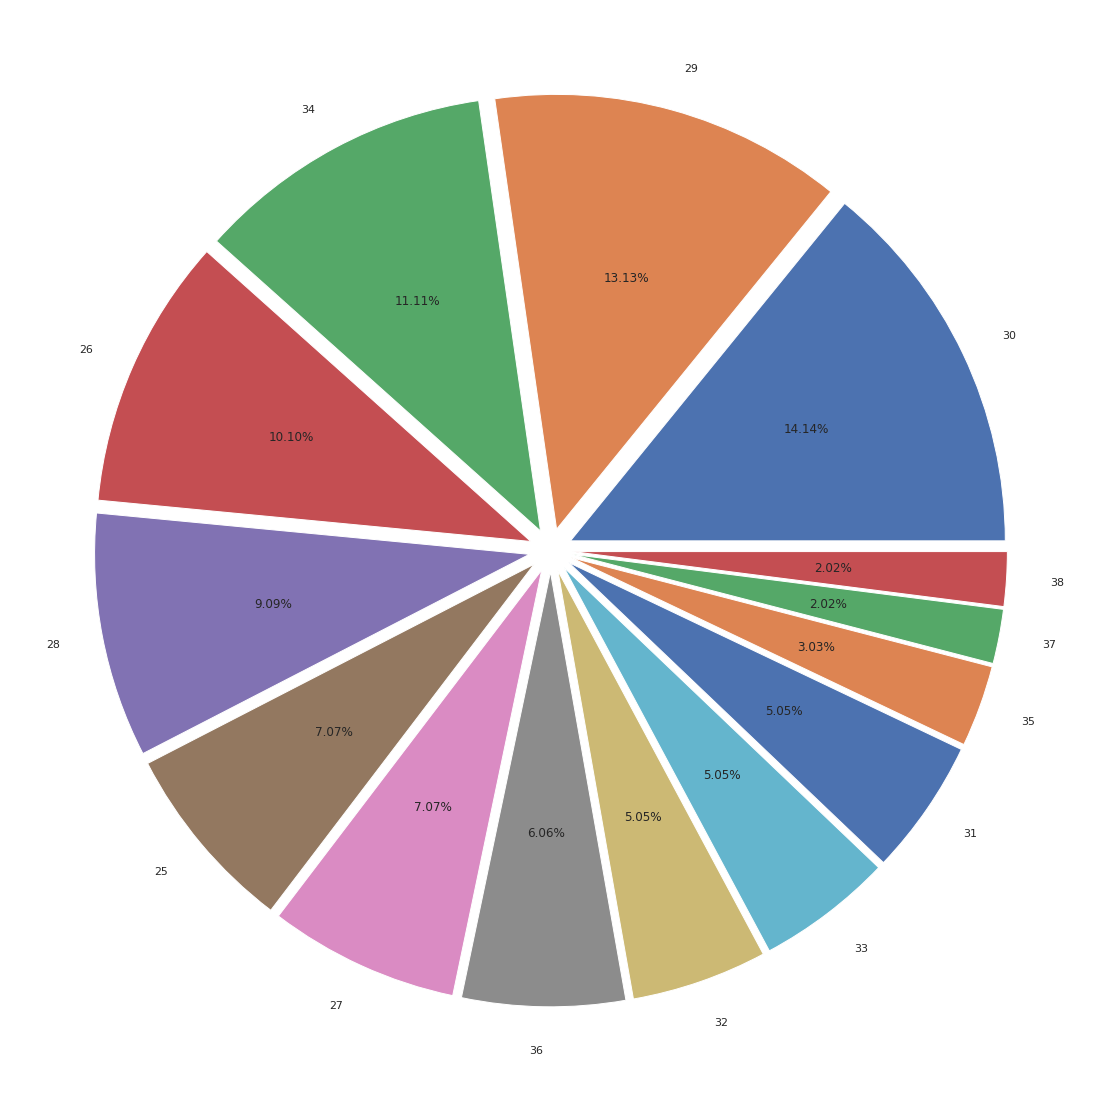

In [13]:
make_pie('Temparature')

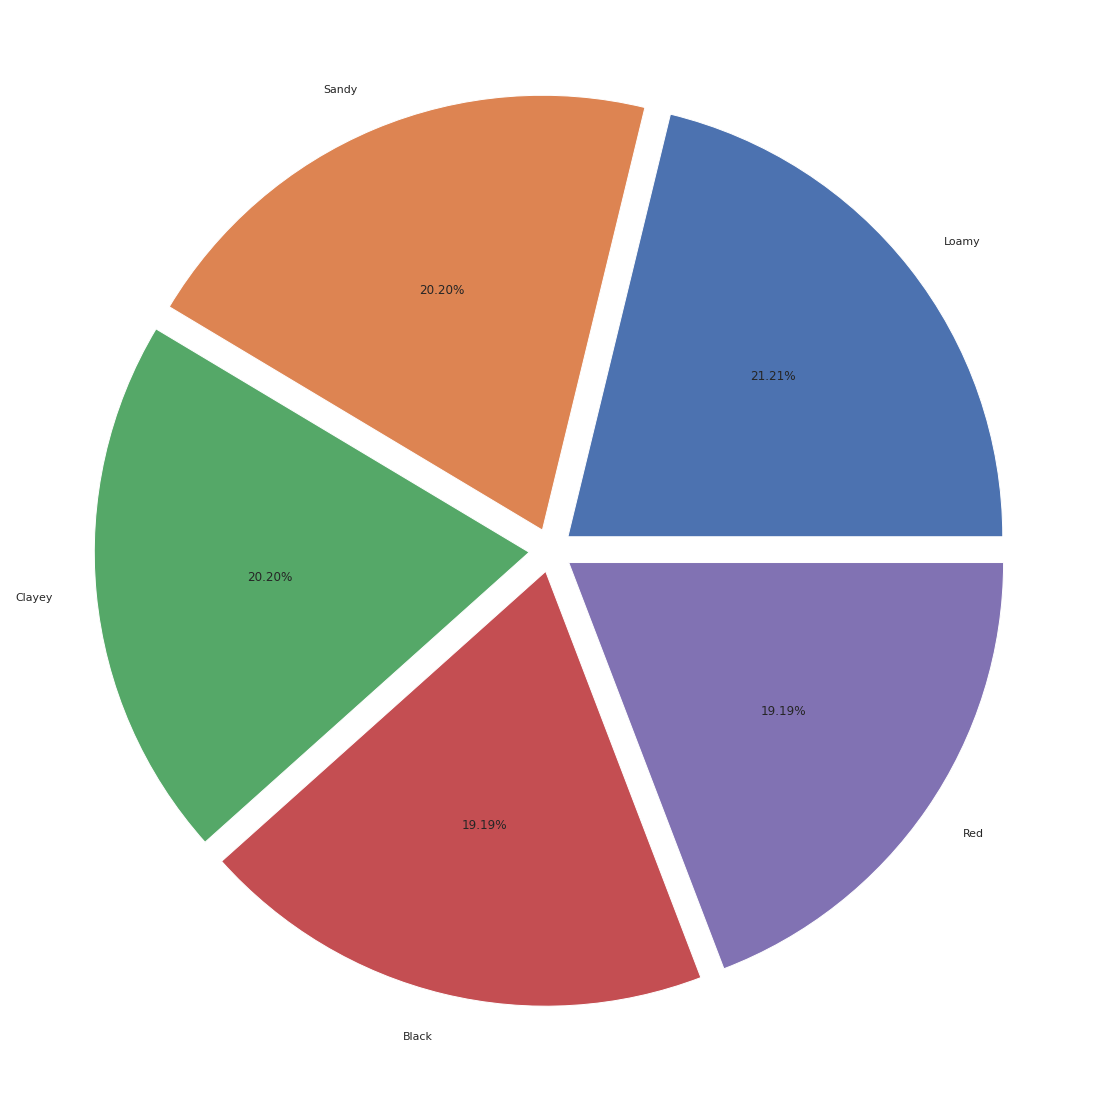

In [14]:
make_pie('Soil Type')

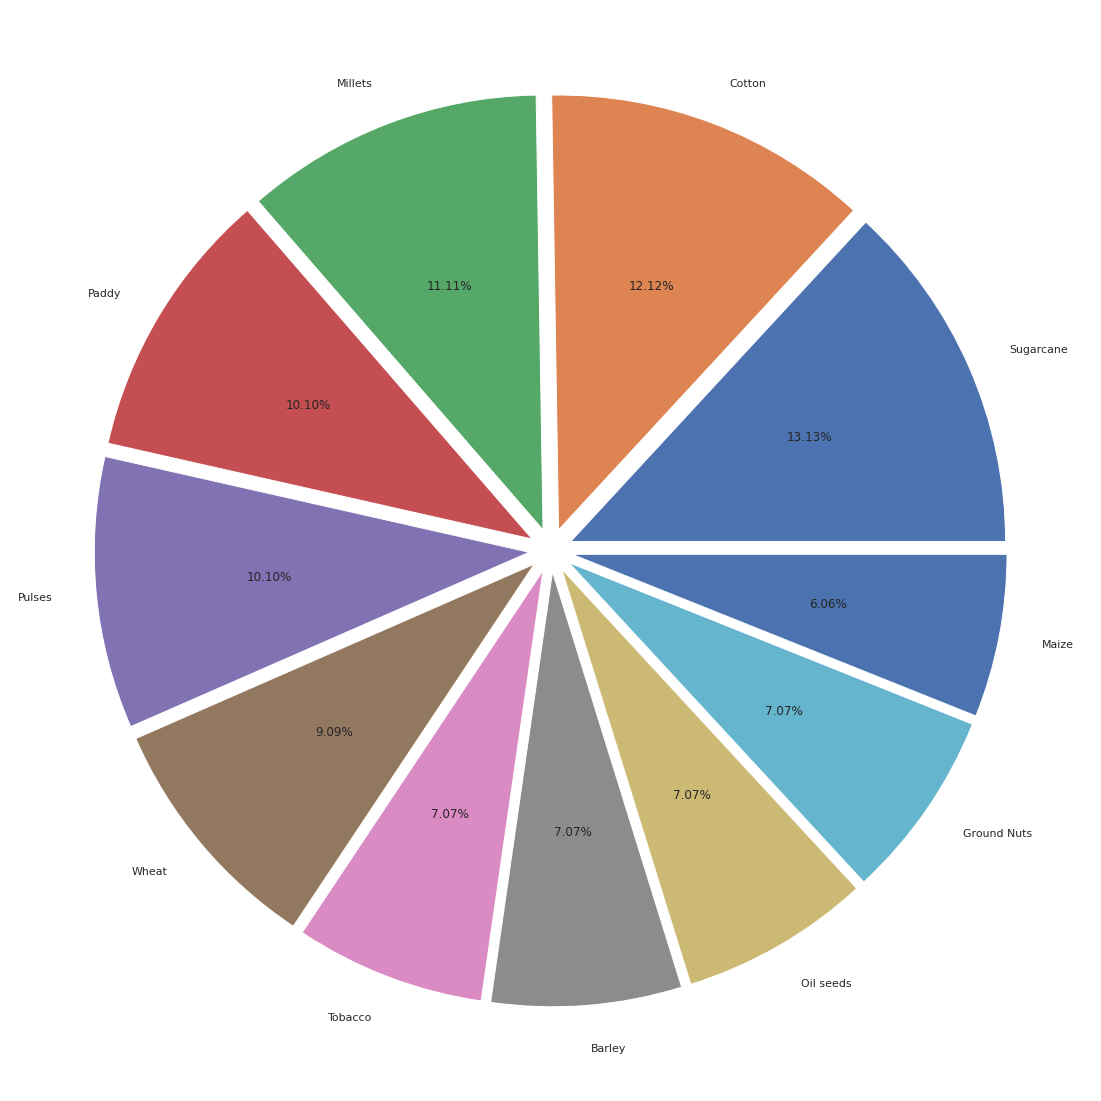

In [16]:
make_pie('Crop Type')

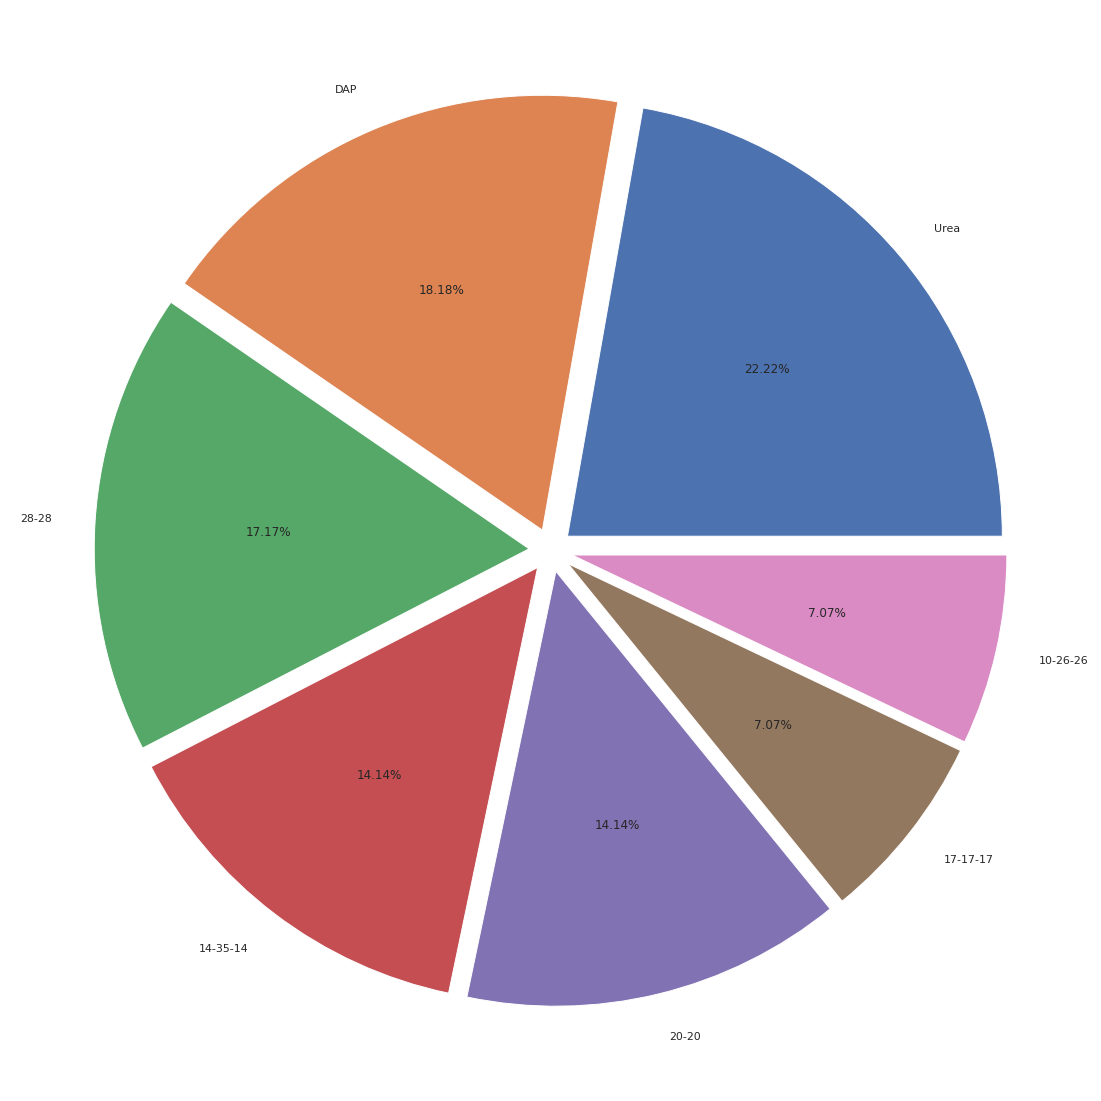

In [40]:
make_pie('Fertilizer_Name')

# Data Engineering

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Nitrogen         99 non-null     int64 
 4   Potassium        99 non-null     int64 
 5   Phosphorous      99 non-null     int64 
 6   Fertilizer_Name  99 non-null     object
 7   Soil_Code        99 non-null     int64 
 8   Crop_Code        99 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 7.1+ KB


In [25]:
def make_label_encoder(original, new):
  le = LabelEncoder()
  le.fit(df[original])
  df[new] = le.transform(df[original])
  df.drop([original], axis=1, inplace=True)
  le_type = pd.DataFrame(zip(le.classes_, le.transform(le.classes_)), columns=['Original', 'Encoded'])
  le_type.set_index('Original')
  print(le_type)

In [26]:
make_label_encoder('Soil Type', 'Soil_Code')

  Original  Encoded
0    Black        0
1   Clayey        1
2    Loamy        2
3      Red        3
4    Sandy        4


In [27]:
make_label_encoder('Crop Type', 'Crop_Code')

       Original  Encoded
0        Barley        0
1        Cotton        1
2   Ground Nuts        2
3         Maize        3
4       Millets        4
5     Oil seeds        5
6         Paddy        6
7        Pulses        7
8     Sugarcane        8
9       Tobacco        9
10        Wheat       10


In [28]:
df.corr()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Code,Crop_Code
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545,0.036595,0.135211
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044,0.061744,0.130019
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276,-0.053386,-0.155281
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971,-0.159595,0.071803
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192,0.065460,0.025838
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000,0.205794,-0.187574
Soil_Code,0.036595,0.061744,-0.053386,-0.159595,0.065460,0.205794,1.000000,-0.311288
Crop_Code,0.135211,0.130019,-0.155281,0.071803,0.025838,-0.187574,-0.311288,1.000000


<Axes: >

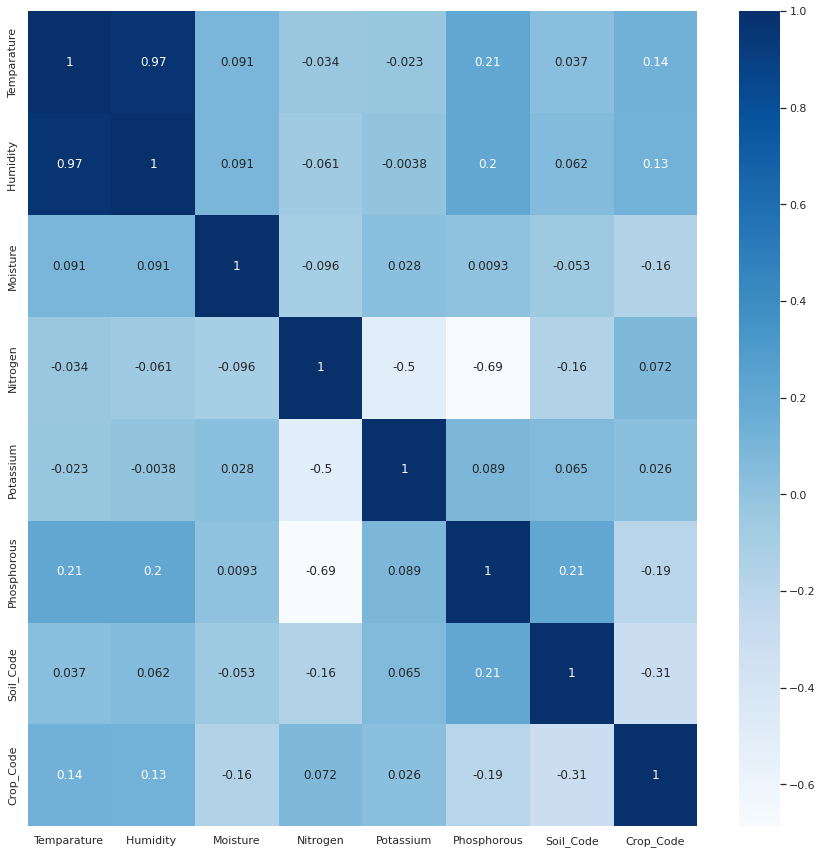

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

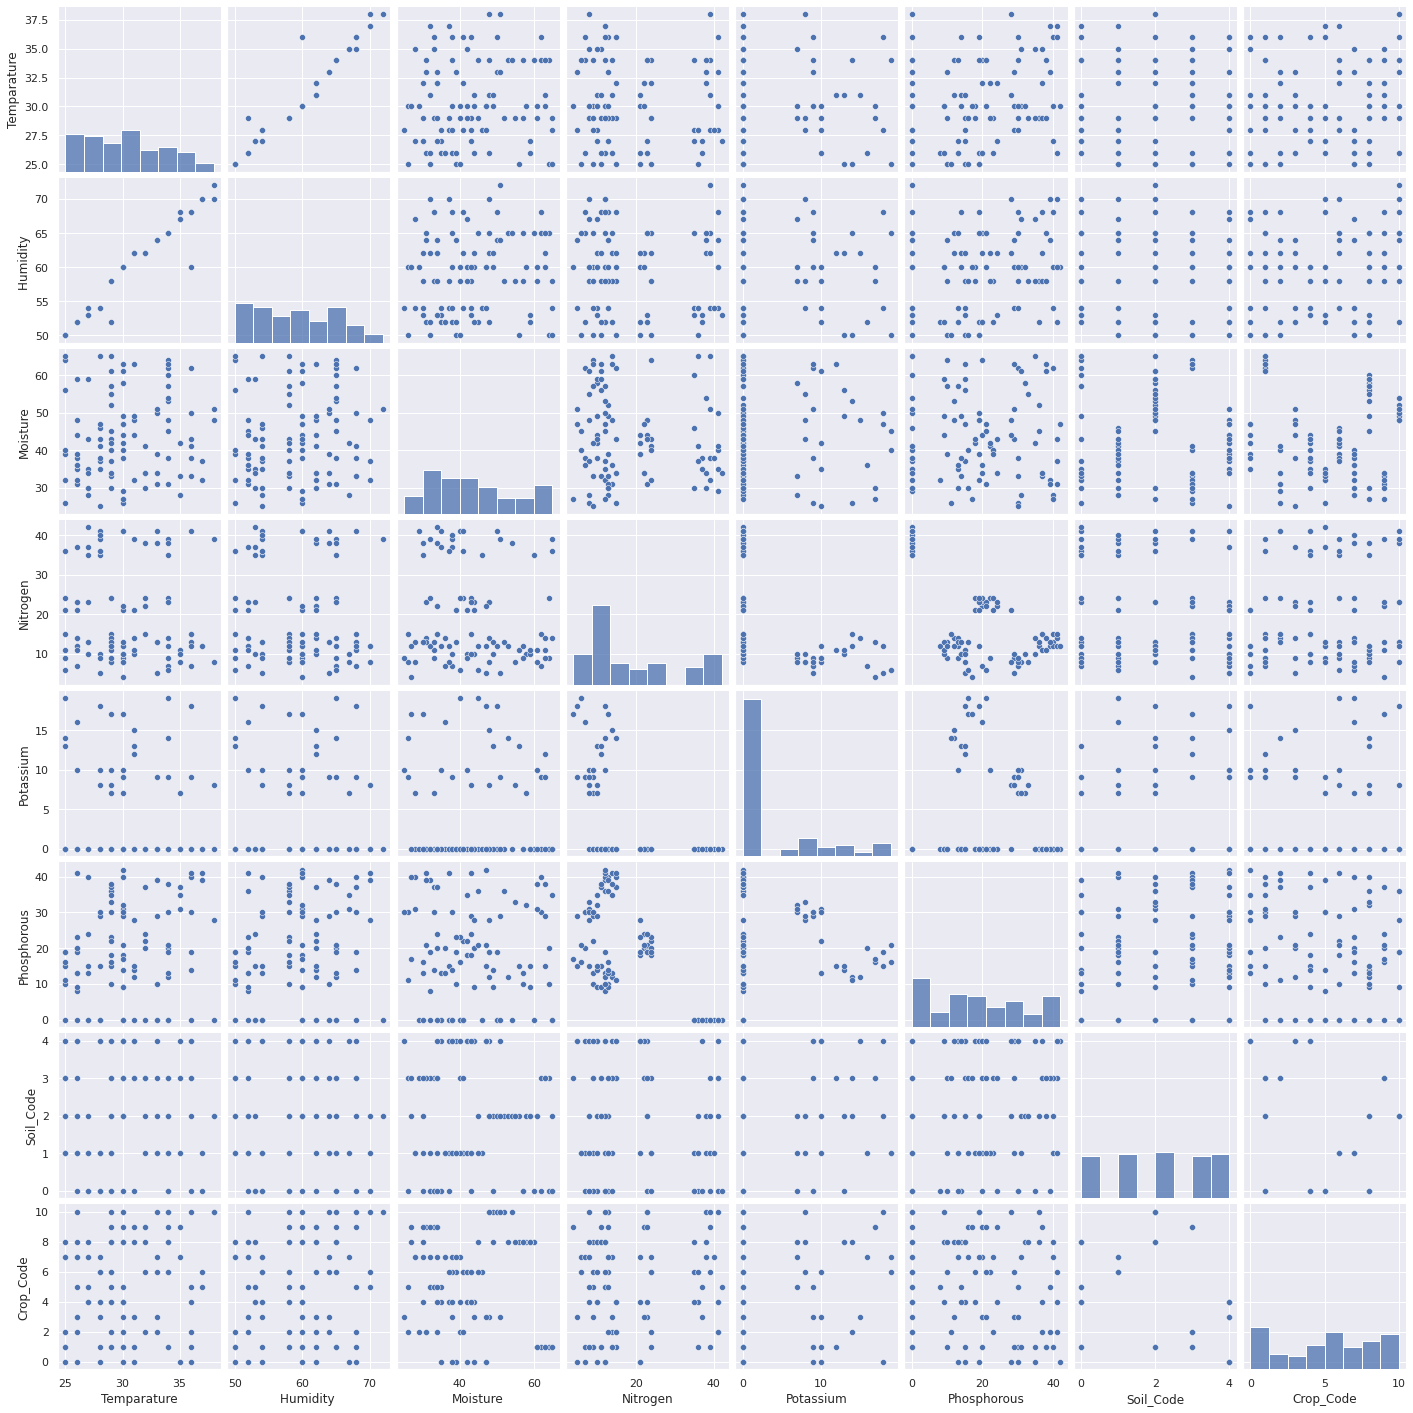

In [36]:
sns.pairplot(df)

# Splitting the Dataset

In [39]:
X = df.drop(columns='Fertilizer_Name', axis=1)
Y = df.Fertilizer_Name

In [42]:
print(X)

    Temparature  Humidity   Moisture  Nitrogen  Potassium  Phosphorous  \
0            26         52        38        37          0            0   
1            29         52        45        12          0           36   
2            34         65        62         7          9           30   
3            32         62        34        22          0           20   
4            28         54        46        35          0            0   
..          ...        ...       ...       ...        ...          ...   
94           25         50        32        24          0           19   
95           30         60        27         4         17           17   
96           38         72        51        39          0            0   
97           36         60        43        15          0           41   
98           29         58        57        12          0           10   

    Soil_Code  Crop_Code  
0           4          3  
1           2          8  
2           0          1  
3  

In [43]:
print(Y)

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: Fertilizer_Name, Length: 99, dtype: object


In [44]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.3, shuffle=True, random_state=42)

In [45]:
Xtrain.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Code,Crop_Code
94,25,50,32,24,0,19,1,7
30,29,58,40,24,0,23,3,2
28,37,70,32,12,0,39,0,5
89,29,58,61,11,0,38,2,1
5,26,52,35,12,10,13,4,0


In [46]:
Ytrain.head()

94       28-28
30       28-28
28         DAP
89         DAP
5     17-17-17
Name: Fertilizer_Name, dtype: object

#Model Training

Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(Xtrain, Ytrain)

pred_train = model1.predict(Xtrain)
pred_test = model1.predict(Xtest)

In [76]:
train_acc = metrics.accuracy_score(Ytrain, pred_train)
print("The accuracy on training set: ", train_acc)

test_acc = metrics.accuracy_score(Ytest, pred_test)
print("The accuracy on test set: ", test_acc)

print(metrics.classification_report(Ytest,pred_test))

The accuracy on training set:  1.0
The accuracy on test set:  1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         2
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         6
         DAP       1.00      1.00      1.00         7
        Urea       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [77]:
scores = cross_val_score(model1, X, Y, cv=5)
scores

array([0.95, 1.  , 1.  , 1.  , 1.  ])

Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()

model2.fit(Xtrain, Ytrain)

pred_train = model2.predict(Xtrain)
pred_test = model2.predict(Xtest)

In [79]:
train_acc = metrics.accuracy_score(Ytrain, pred_train)
print("The accuracy on training set: ", train_acc)

test_acc = metrics.accuracy_score(Ytest, pred_test)
print("The accuracy on test set: ", test_acc)

print(metrics.classification_report(Ytest,pred_test))

The accuracy on training set:  1.0
The accuracy on test set:  1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         2
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         6
         DAP       1.00      1.00      1.00         7
        Urea       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [80]:
scores = cross_val_score(model2, X, Y, cv=5)
scores

array([0.95, 1.  , 0.95, 0.95, 1.  ])

Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=100, criterion='gini')

model3.fit(Xtrain, Ytrain)

pred_train = model3.predict(Xtrain)
pred_test = model3.predict(Xtest)

In [82]:
train_acc = metrics.accuracy_score(Ytrain, pred_train)
print("The accuracy on training set: ", train_acc)

test_acc = metrics.accuracy_score(Ytest, pred_test)
print("The accuracy on test set: ", test_acc)

print(metrics.classification_report(Ytest,pred_test))

The accuracy on training set:  1.0
The accuracy on test set:  1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         2
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         6
         DAP       1.00      1.00      1.00         7
        Urea       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [83]:
scores = cross_val_score(model3, X, Y, cv=5)
scores

array([1.  , 1.  , 1.  , 0.95, 1.  ])

XGBoost

In [84]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

model4 = xgb.XGBClassifier()

le = LabelEncoder()
Ytrain_le = le.fit_transform(Ytrain)
Ytest_le = le.fit_transform(Ytest)


model4.fit(Xtrain, Ytrain_le)

pred_train = model4.predict(Xtrain)
pred_test = model4.predict(Xtest)

In [85]:
train_acc = metrics.accuracy_score(Ytrain_le, pred_train)
print("The accuracy on training set: ", train_acc)

test_acc = metrics.accuracy_score(Ytest_le, pred_test)
print("The accuracy on test set: ", test_acc)

print(metrics.classification_report(Ytest_le,pred_test))

The accuracy on training set:  1.0
The accuracy on test set:  0.9666666666666667
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7

    accuracy                           0.97        30
   macro avg       0.96      0.93      0.93        30
weighted avg       0.97      0.97      0.96        30



# Saving the Model

In [87]:
import pickle

file = 'fertilizer.pkl'
fileobj = open(file, 'wb')

pickle.dump(model3, fileobj)

fileobj.close()


# Prediction

In [66]:
data = np.array([[25,	50,	32,	24,	0,	19,	1,	7]])

prediction = model1.predict(data)

print(prediction)

['28-28']
